In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

In [2]:
x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))

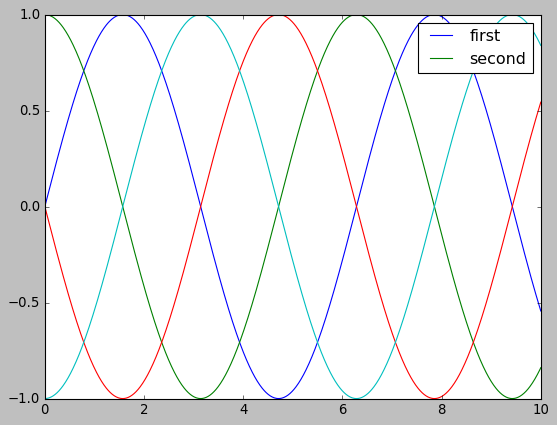

In [3]:
lines = plt.plot(x, y)
plt.legend(lines[:2], ['first', 'second']);

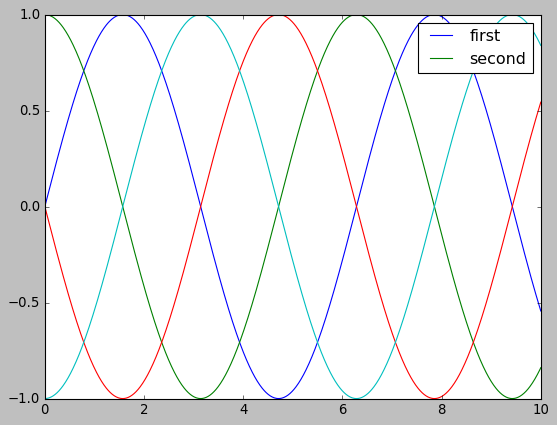

In [4]:
plt.plot(x, y[:, 0], label = 'first')
plt.plot(x, y[:, 1], label = 'second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha = 1, frameon = True)

In [5]:
cities = pd.read_csv('data\california_cities.csv')

In [6]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [7]:
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

Text(0.5, 1.0, 'California Cities: Area and Population')

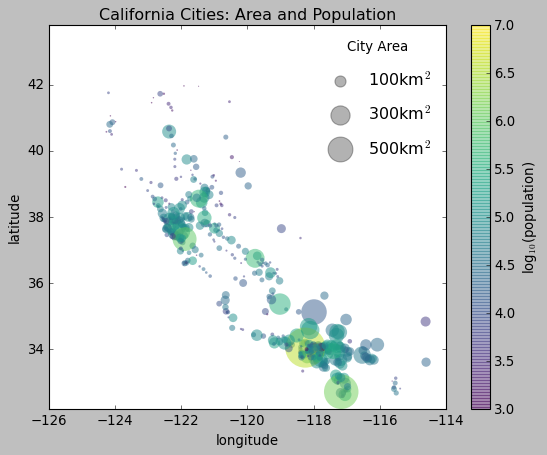

In [8]:
plt.scatter(lon, lat, label = None, c = np.log10(population), cmap = 'viridis', s = area, linewidth = 0, alpha = 0.5)
plt.axis('equal')

plt.xlabel('longitude')
plt.ylabel('latitude')

plt.colorbar(label = 'log$_{10}$(population)')
plt.clim(3, 7)

for area in [100, 300, 500]: #creating empty plots
    plt.scatter([], [], c = 'k', alpha = 0.3, s = area, label = str(area) + 'km$^2$')
    
plt.legend(scatterpoints = 1, frameon = False, labelspacing = 1, title = 'City Area')

plt.title('California Cities: Area and Population')

In [9]:
lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

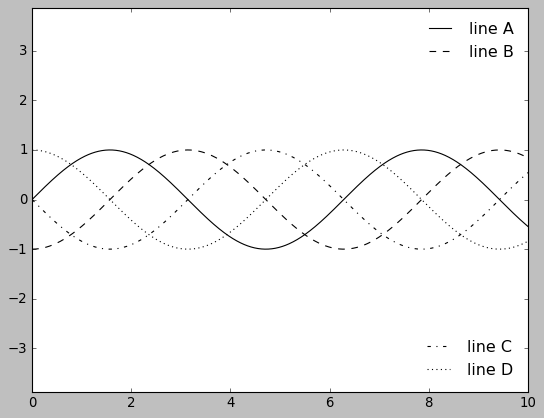

In [10]:
fig, ax = plt.subplots()

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi/2), styles[i], color = 'k')
    
ax.axis('equal')

ax.legend(lines[:2], ['line A', 'line B'], loc = 'upper right', frameon = False)

from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc = 'lower right', frameon = False)
ax.add_artist(leg)

In [11]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

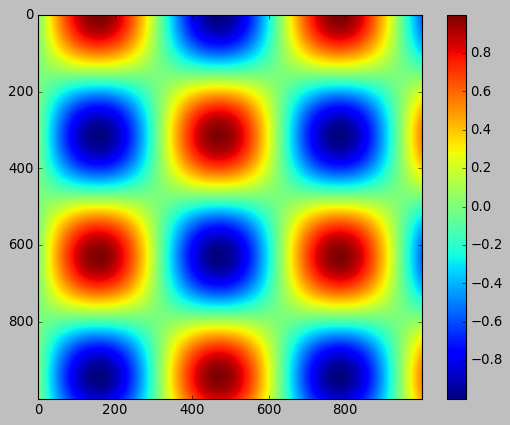

In [12]:
plt.imshow(I)
plt.colorbar();

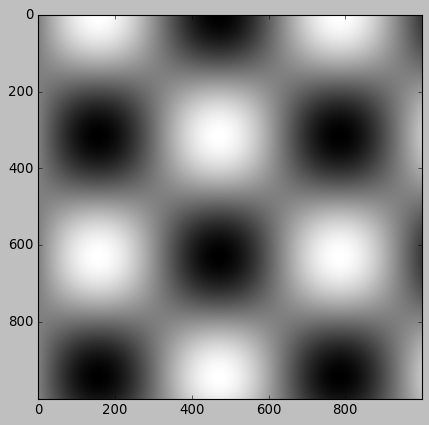

In [13]:
plt.imshow(I, cmap = 'gray');

In [14]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + '_gray', colors, cmap.N)

def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize = (6, 2), subplot_kw = dict(xticks = [], yticks = []))
    ax[0].imshow([colors], extent = [0, 10, 0, 1])
    ax[1].imshow([grayscale], extent = [0, 10, 0, 1])

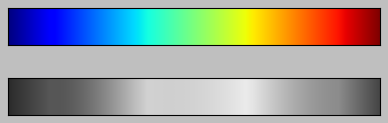

In [15]:
view_colormap('jet')

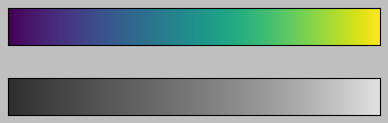

In [16]:
view_colormap('viridis')

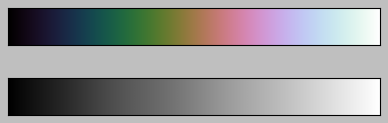

In [17]:
view_colormap('cubehelix')

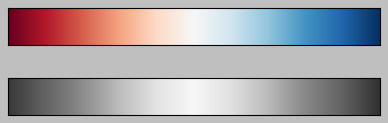

In [18]:
view_colormap('RdBu')

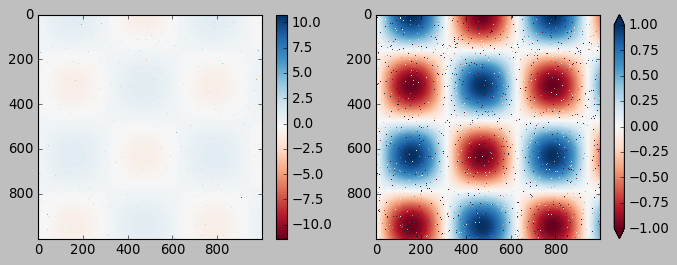

In [19]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize = (10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap = 'RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap = 'RdBu')
plt.colorbar(extend = 'both')
plt.clim(-1, 1);

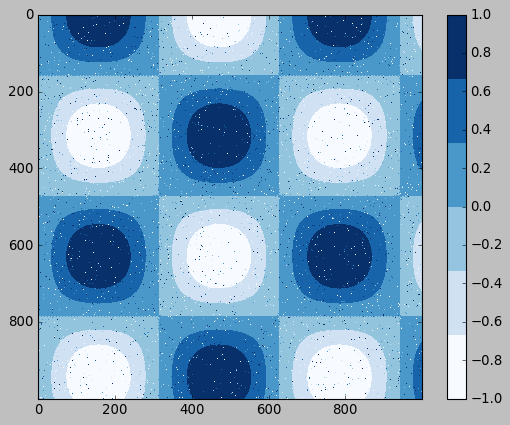

In [20]:
plt.imshow(I, cmap = plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

In [21]:
from sklearn.datasets import load_digits
digits = load_digits(n_class = 6)

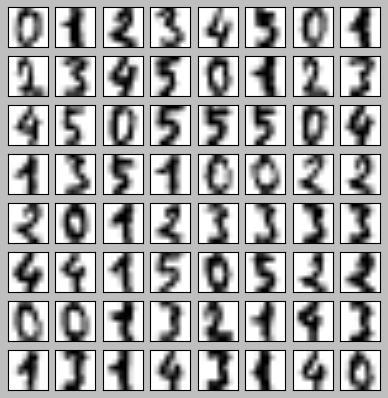

In [22]:
fig, ax = plt.subplots(8, 8, figsize = (6, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap = 'binary')
    axi.set(xticks = [], yticks = [])

In [23]:
from sklearn.manifold import Isomap

iso = Isomap(n_components = 2)
projection = iso.fit_transform(digits.data)

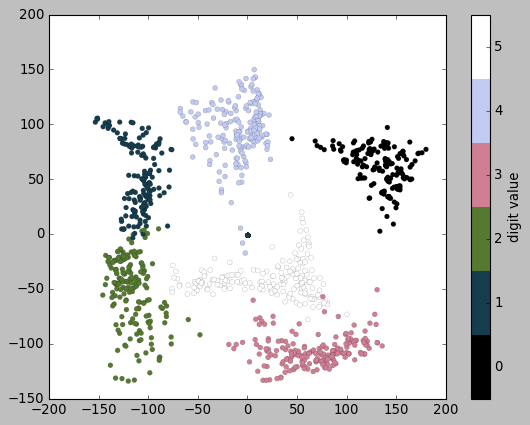

In [24]:
plt.scatter(projection[:, 0], projection[:, 1], lw = 0.1, c = digits.target, cmap = plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks = range(6), label = 'digit value')
plt.clim(-0.5, 5.5);

In [25]:
plt.style.use('seaborn-white')

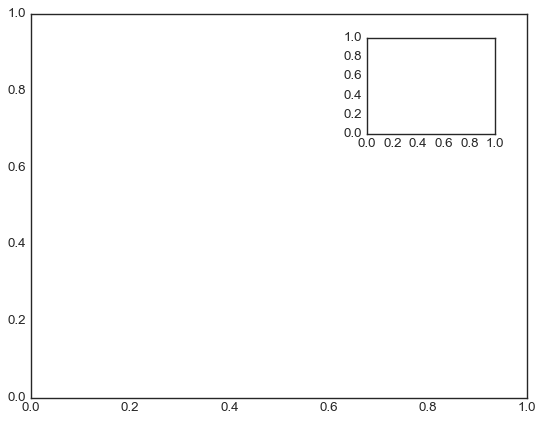

In [26]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

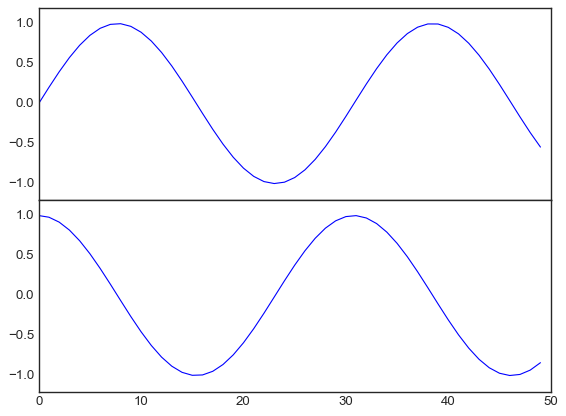

In [27]:
fig = plt.figure()

ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels = [], ylim = (-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim = (-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

In [28]:
plt.text?

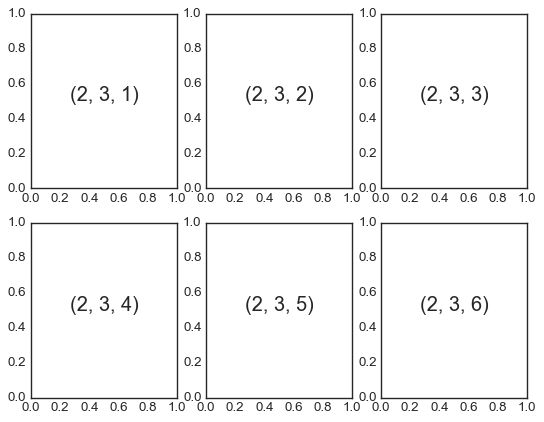

In [29]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize = 18, ha = 'center')

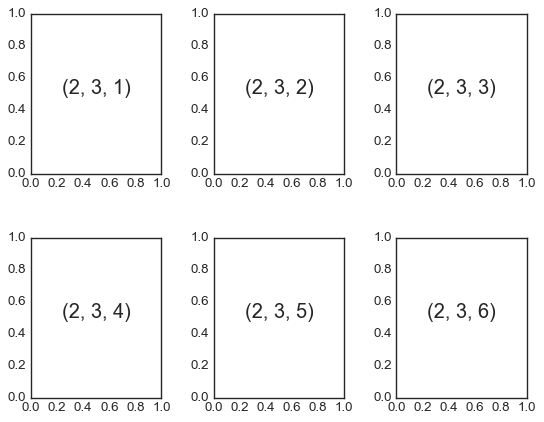

In [30]:
fig = plt.figure()
fig.subplots_adjust(wspace = 0.4, hspace = 0.4)

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize = 18, ha = 'center')

In [31]:
fig.subplots_adjust?

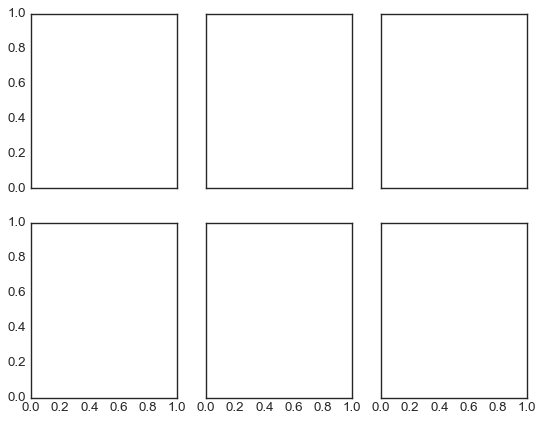

In [32]:
fig, ax = plt.subplots(2, 3, sharex = 'col', sharey = 'row')

In [33]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize = 18, ha = 'center')

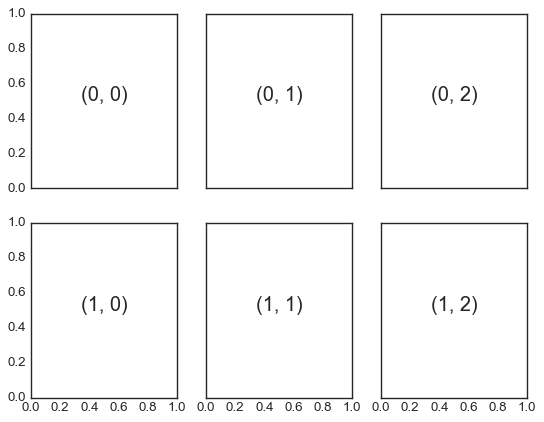

In [34]:
fig

In [35]:
grid = plt.GridSpec(2, 3, wspace = 0.4, hspace = 0.3)

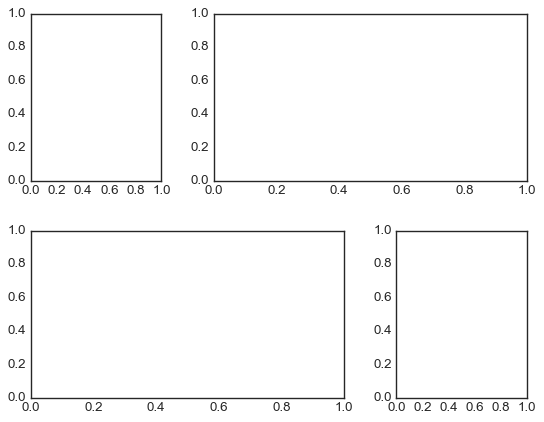

In [37]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])

plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

In [40]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

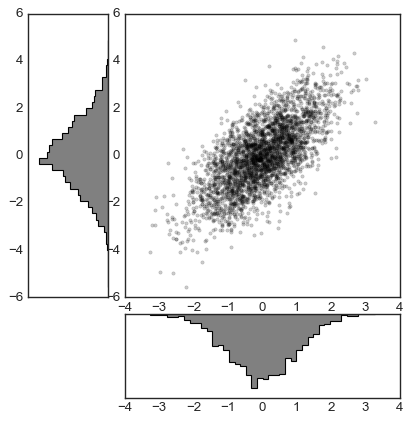

In [51]:
fig = plt.figure(figsize = (6, 6))
grid = plt.GridSpec(4, 4, hspace = 0.2, wspace = 0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels = [], sharey = main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels = [], sharex = main_ax)

main_ax.plot(x, y, 'ok', markersize = 3, alpha = 0.2)

y_hist.hist(y, 40, histtype = 'stepfilled', orientation = 'horizontal', color = 'gray')
y_hist.invert_xaxis()

x_hist.hist(x, 40, histtype = 'stepfilled', orientation = 'vertical', color = 'gray')
x_hist.invert_yaxis()

In [52]:
plt.style.use('seaborn-white')

In [53]:
births = pd.read_csv('data/births.csv')

In [54]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [57]:
births['day'] = births['day'].astype(int)

<ipython-input-57-f34441c15b37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)


In [60]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')

In [62]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

In [64]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

<ipython-input-64-e084d208a81a>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


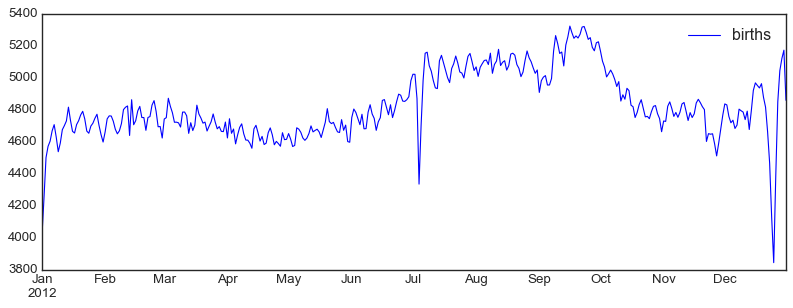

In [67]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax);

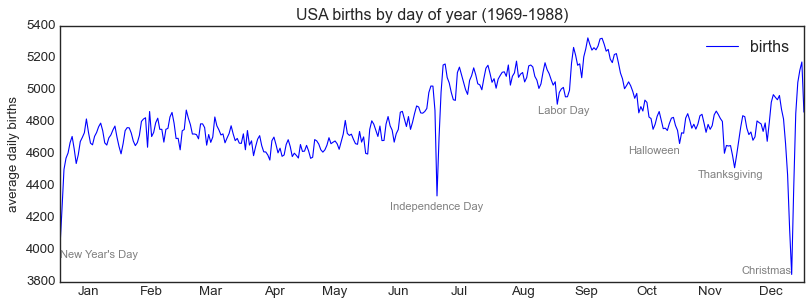

In [79]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)

style = dict(size = 10, color = 'gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, 'Independence Day', ha = 'center', **style)
ax.text('2012-9-4', 4850, 'Labor Day', ha = 'center', **style)
ax.text('2012-10-31', 4600, 'Halloween', ha = 'right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha = 'center', **style)
ax.text('2012-12-25', 3850, 'Christmas', ha = 'right', **style)

ax.set(title = 'USA births by day of year (1969-1988)', ylabel = 'average daily births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday = 15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

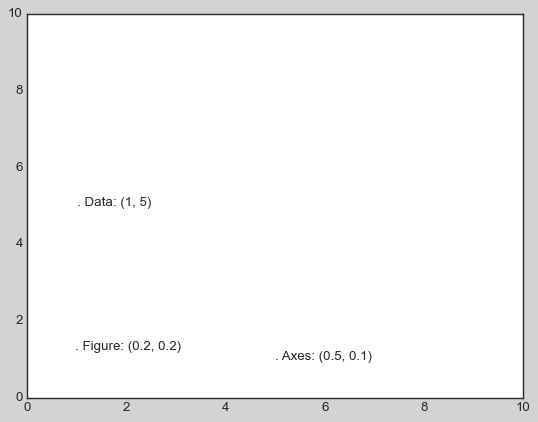

In [84]:
fig, ax = plt.subplots(facecolor = 'lightgray')
ax.axis([0, 10, 0, 10])

ax.text(1, 5, '. Data: (1, 5)', transform = ax.transData)
ax.text(0.5, 0.1, '. Axes: (0.5, 0.1)', transform = ax.transAxes)
ax.text(0.2, 0.2, '. Figure: (0.2, 0.2)', transform = fig.transFigure);

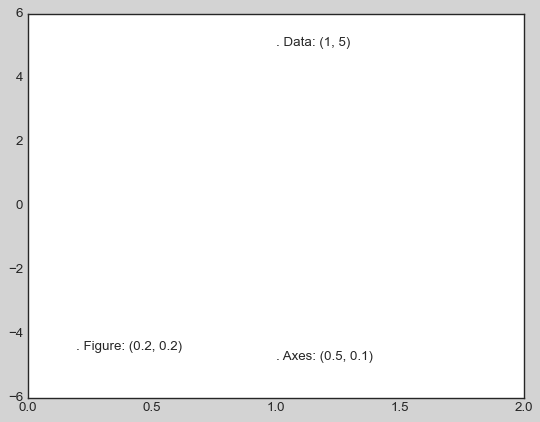

In [85]:
ax.set(xlim = (0, 2), ylim = (-6, 6))
fig

In [86]:
%matplotlib notebook

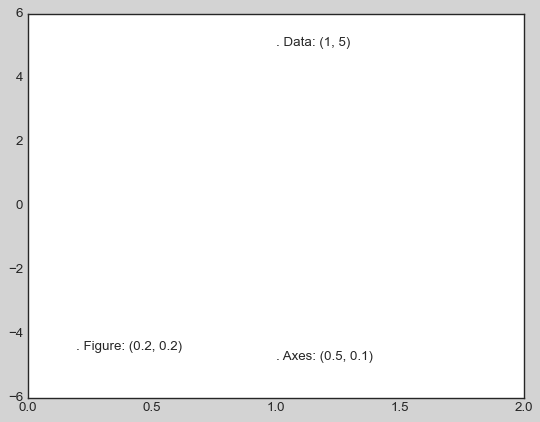

In [87]:
fig

In [90]:
ax.set(xlim = (0, 4), ylim = (-6, 5.5))

[(0.0, 4.0), (-6.0, 5.5)]

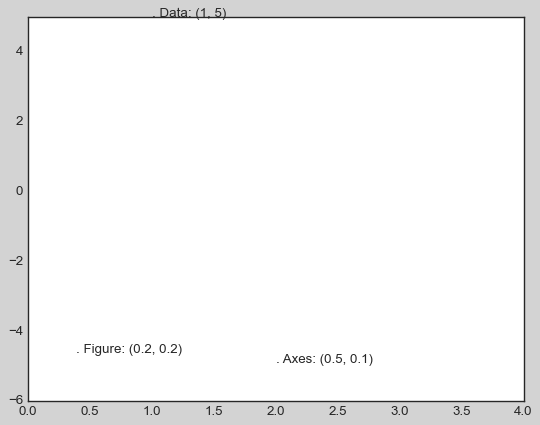

In [89]:
fig

In [91]:
%matplotlib inline

In [102]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy = (6.28, 1), xytext = (10, 4), arrowprops = dict(facecolor = 'black', shrink = 0.05))
ax.annotate('local minimum', xy = (5 * np.pi - 1), xytext = (2, -6), arrowprops = dict(arrowstyle = '->', connectionstyle = 'angle3,angleA=0,angleB = -90'));

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000000008D81EE0> (for post_execute):


TypeError: cannot unpack non-iterable float object

TypeError: cannot unpack non-iterable float object

<Figure size 432x288 with 1 Axes>

In [94]:
ax.annotate?